In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

seattle_calendar = pd.read_csv('./Seattle/calendar.csv')
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2318,2019-09-22,t,$475.00,$475.00,30,1000
1,2318,2019-09-23,t,$475.00,$475.00,30,1000
2,2318,2019-09-24,t,$475.00,$475.00,30,1000
3,2318,2019-09-25,f,$475.00,$475.00,30,1000
4,2318,2019-09-26,f,$475.00,$475.00,30,1000


In [2]:
seattle_calendar["price"].value_counts

<bound method IndexOpsMixin.value_counts of 0          $475.00
1          $475.00
2          $475.00
3          $475.00
4          $475.00
            ...   
3299595    $100.00
3299596    $100.00
3299597    $100.00
3299598    $100.00
3299599    $100.00
Name: price, Length: 3299600, dtype: object>

In [4]:
seattle_calendar["date_format"] = pd.to_datetime(seattle_calendar['date'], format='%Y-%m-%d')
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,date_format
0,2318,2019-09-22,t,$475.00,$475.00,30,1000,2019-09-22
1,2318,2019-09-23,t,$475.00,$475.00,30,1000,2019-09-23
2,2318,2019-09-24,t,$475.00,$475.00,30,1000,2019-09-24
3,2318,2019-09-25,f,$475.00,$475.00,30,1000,2019-09-25
4,2318,2019-09-26,f,$475.00,$475.00,30,1000,2019-09-26


In [14]:
seattle_calendar_splited = seattle_calendar
price_splited= seattle_calendar_splited["price"].str.split("$", n = 1, expand = True)


In [44]:
seattle_calendar_splited["total_price"] = price_splited[1]
seattle_calendar_splited["total_price"] = seattle_calendar_splited["total_price"].str.replace(',', '').astype(float)
seattle_calendar_splited.head()

,listing_id,date,available,minimum_nights,maximum_nights,date_format,total_price
0,2318,2019-09-22,t,30,1000,2019-09-22,475.0
1,2318,2019-09-23,t,30,1000,2019-09-23,475.0
2,2318,2019-09-24,t,30,1000,2019-09-24,475.0
3,2318,2019-09-25,f,30,1000,2019-09-25,475.0
4,2318,2019-09-26,f,30,1000,2019-09-26,475.0


In [45]:
seattle_calendar_splited = seattle_calendar_splited.drop(columns=["listing_id","date","available","minimum_nights","maximum_nights"])
seattle_calendar_splited.head()

,date_format,total_price
0,2019-09-22,475.0
1,2019-09-23,475.0
2,2019-09-24,475.0
3,2019-09-25,475.0
4,2019-09-26,475.0


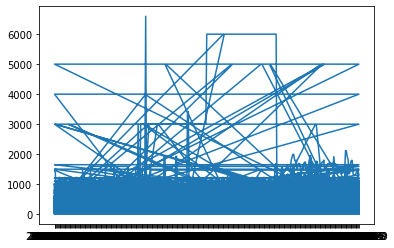

In [40]:
plt.plot(seattle_calendar_splited.date, seattle_calendar_splited.total_price)

In [32]:
seattle_calendar_splited.total_price.mean()

155.67198690750394

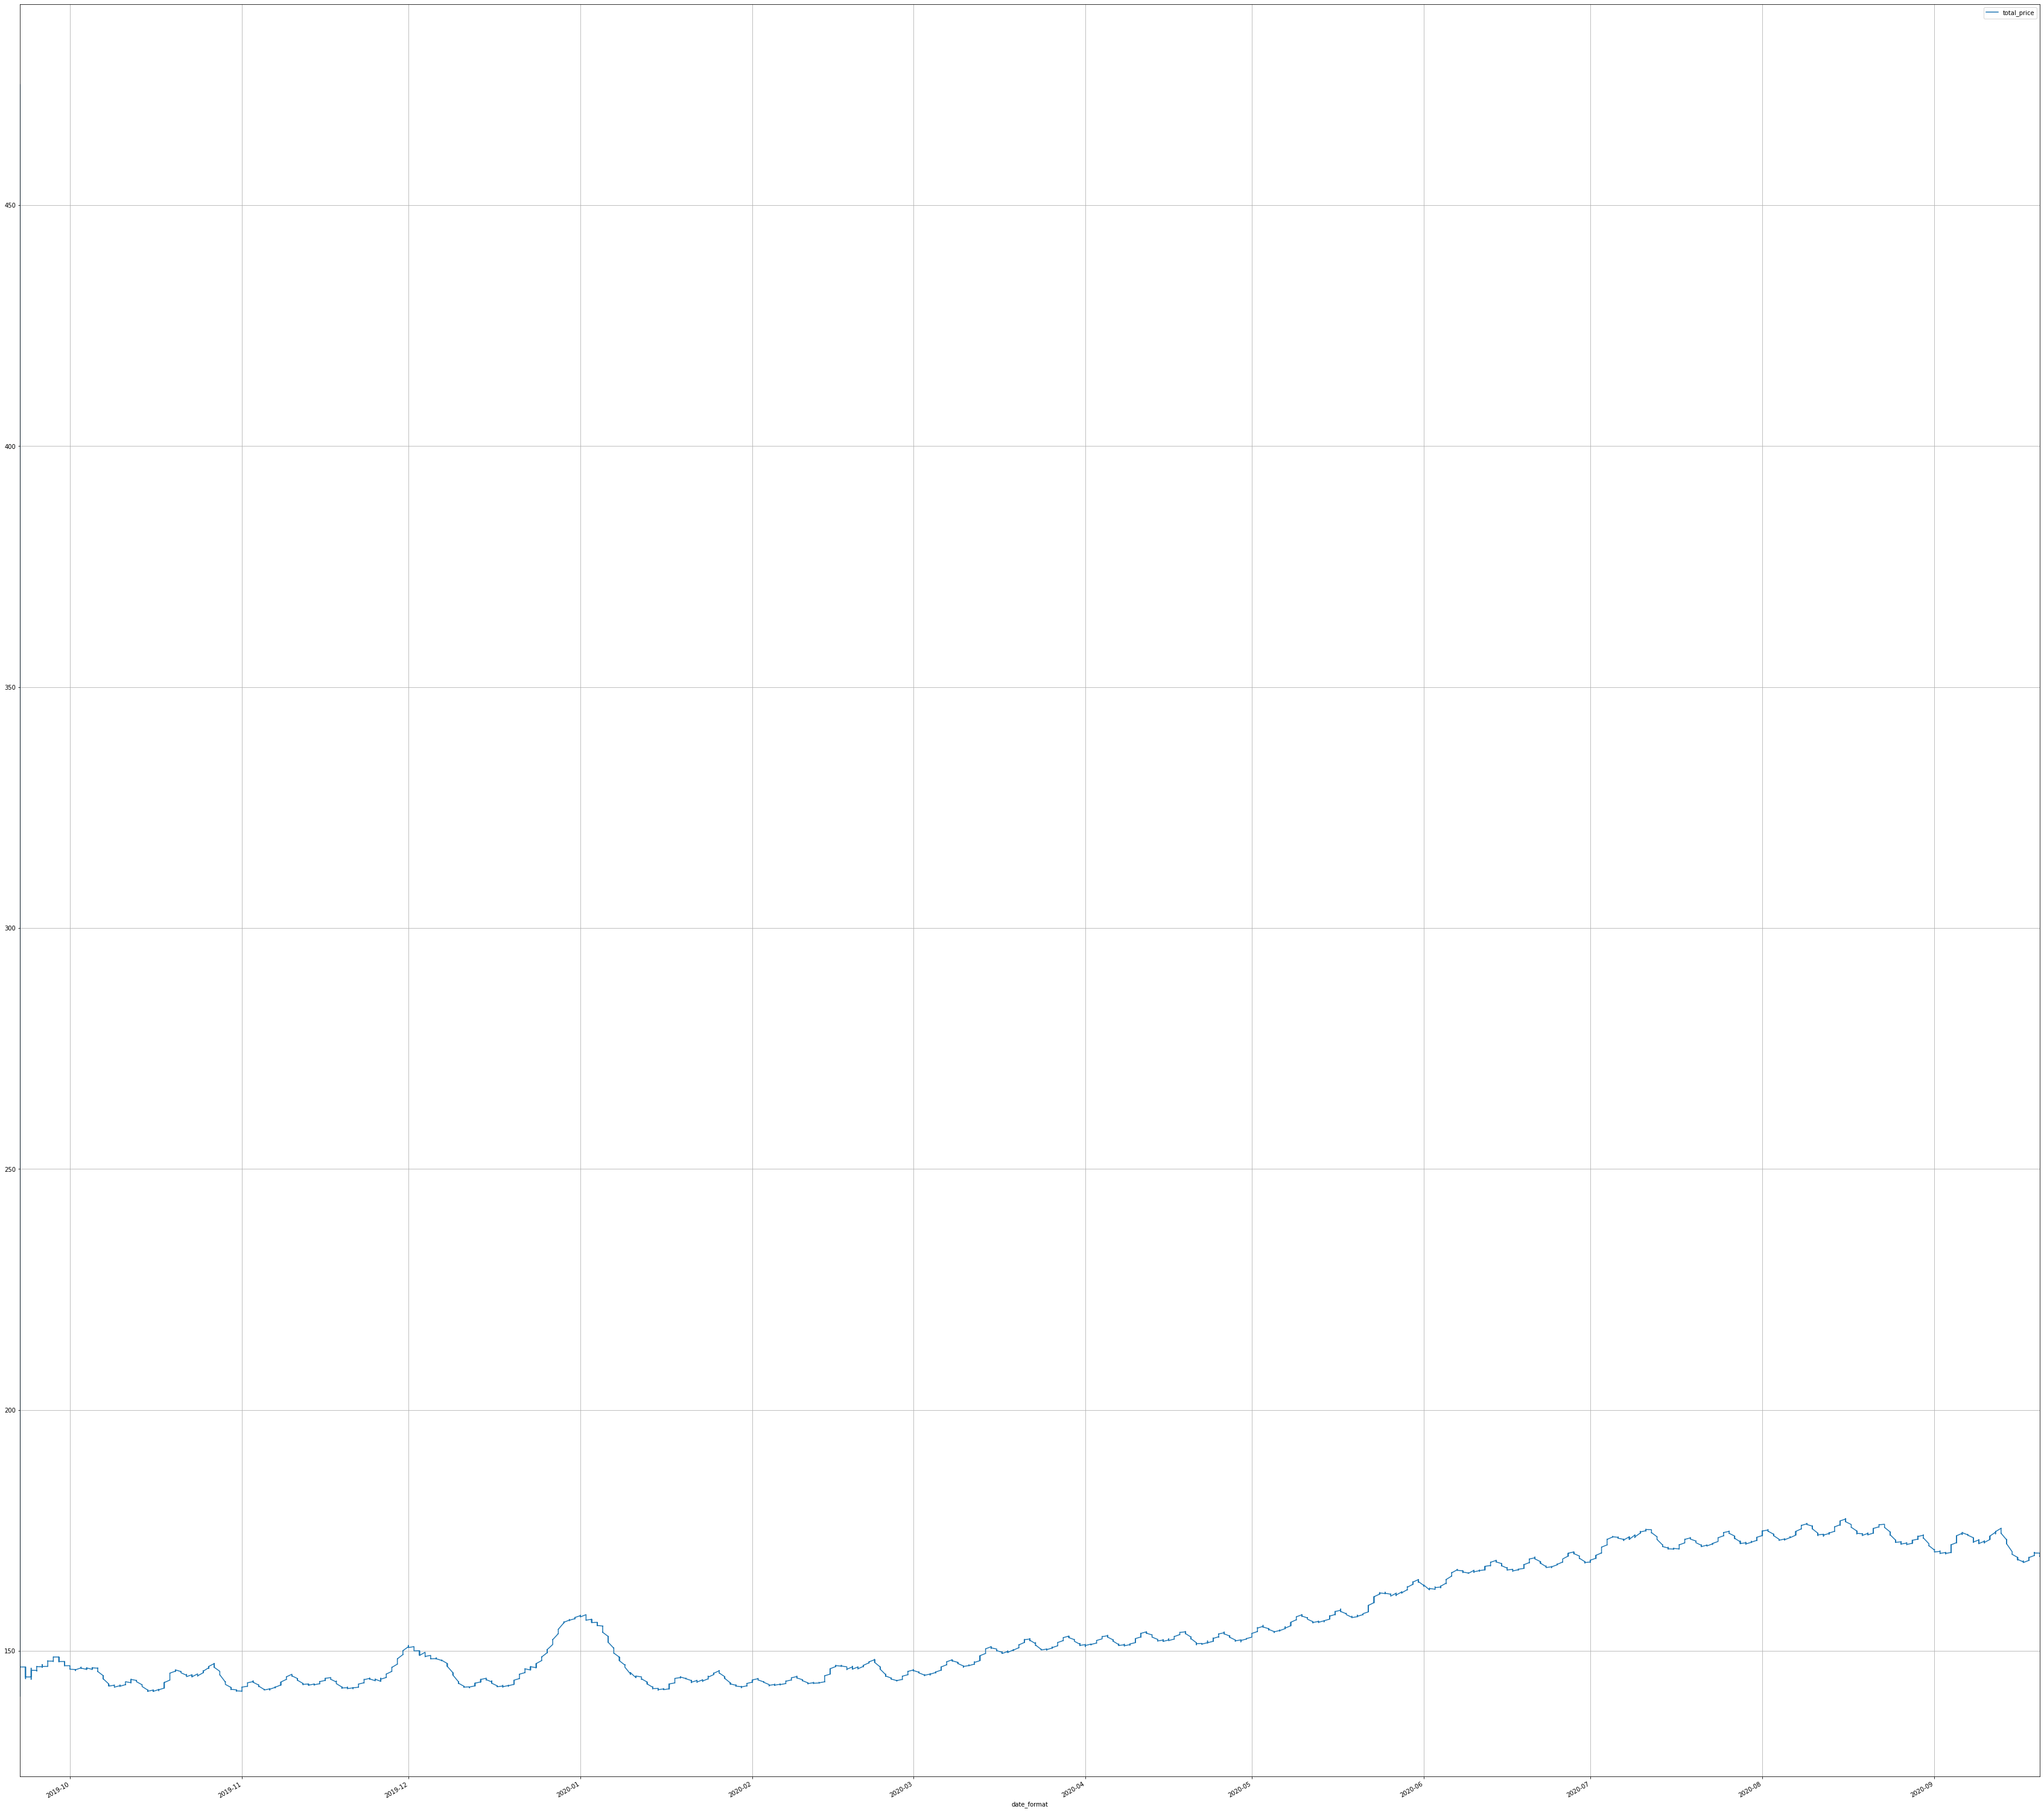

In [48]:

seattle_calendar_splited_date = seattle_calendar_splited
seattle_calendar_splited_date['date_format'] = seattle_calendar_splited_date.apply(lambda row: pd.Timestamp(row.date_format), axis=1 )
seattle_calendar_splited_date = seattle_calendar_splited_date.set_index(seattle_calendar_splited_date.date_format).drop('date_format', axis=1)
seattle_calendar_splited_date.sort_index(inplace=True)

seattle_calendar_splited_date.rolling('10d').mean().plot(figsize=(60,60),grid='true')

In [55]:
seattle_calendar_splited['date_format'].isna().mean()

0.0

In [57]:
seattle_calendar_splited['date_format'].value_counts

<bound method IndexOpsMixin.value_counts of 0         2019-09-22
1         2019-09-23
2         2019-09-24
3         2019-09-25
4         2019-09-26
             ...    
3299595   2020-09-16
3299596   2020-09-17
3299597   2020-09-18
3299598   2020-09-19
3299599   2020-09-20
Name: date_format, Length: 3299600, dtype: datetime64[ns]>

In [58]:
seattle_calendar["date_format"].value_counts

<bound method IndexOpsMixin.value_counts of 0         2019-09-22
1         2019-09-23
2         2019-09-24
3         2019-09-25
4         2019-09-26
             ...    
3299595   2020-09-16
3299596   2020-09-17
3299597   2020-09-18
3299598   2020-09-19
3299599   2020-09-20
Name: date_format, Length: 3299600, dtype: datetime64[ns]>

In [59]:
seattle_calendar["date_format"].max

<bound method Series.max of 0         2019-09-22
1         2019-09-23
2         2019-09-24
3         2019-09-25
4         2019-09-26
             ...    
3299595   2020-09-16
3299596   2020-09-17
3299597   2020-09-18
3299598   2020-09-19
3299599   2020-09-20
Name: date_format, Length: 3299600, dtype: datetime64[ns]>